# 3.1 Pandas Deep Dive

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Session 1

In [28]:
filepath = "/Users/mehdisalemi/Desktop/Data Science Intensive/DataSets/Stocks/TWTR.csv"
df_TWTR = pd.read_csv(filepath, index_col="Date").dropna()
df_TWTR.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-15,17.980000,18.180000,17.809999,18.080000,17173700,18.080000
2016-07-14,18.020000,18.280001,17.910000,17.959999,19527300,17.959999
2016-07-13,18.209999,18.320000,17.500000,17.740000,17898800,17.740000
2016-07-12,17.980000,18.379999,17.920000,18.100000,23758800,18.100000
2016-07-11,17.590000,17.879999,17.520000,17.709999,24010200,17.709999


### Stocks listing in the DataFrame

In [29]:
df_TWTR.Close.count()

676

### Earliest and Latest Stocks in the DataFrame

In [30]:
df_TWTR.tail(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-11-07,45.099998,50.09,44.0,44.900002,117701600,44.900002


In [31]:
df_TWTR.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-15,17.98,18.18,17.809999,18.08,17173700,18.08


### How many Stocks have Close between 15-20

In [32]:
df_TWTR[(df_TWTR.Close > 15) & (df_TWTR.Close < 20)].Close.count()

100

# Session 2

### Most 5 Common Stock Close Values?

In [34]:
df_TWTR.Close.value_counts().head(5)

29.059999    4
14.400000    3
50.700001    3
30.910000    2
17.370001    2
Name: Close, dtype: int64

### Which 3 year saw the highest trading volume?

In [44]:

df_TWTR.sort_values("Volume",ascending=False).head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-05-06,35.610001,36.099998,31.719999,31.850000,134710000,31.850000
2015-04-29,40.209999,41.090000,38.070000,38.490002,120488600,38.490002
2013-11-07,45.099998,50.090000,44.000000,44.900002,117701600,44.900002


### Plot the Close Price

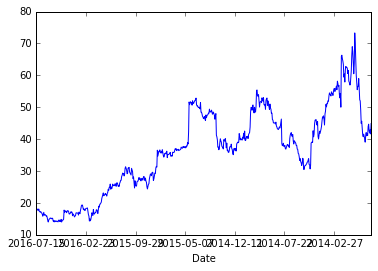

In [45]:
df_TWTR.Close.plot()

# Session 4

### Set Index Differently

In [46]:
df_TWTR2 = pd.read_csv(filepath).dropna()
df_TWTR2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-15,17.980000,18.180000,17.809999,18.080000,17173700,18.080000
1,2016-07-14,18.020000,18.280001,17.910000,17.959999,19527300,17.959999
2,2016-07-13,18.209999,18.320000,17.500000,17.740000,17898800,17.740000
3,2016-07-12,17.980000,18.379999,17.920000,18.100000,23758800,18.100000
4,2016-07-11,17.590000,17.879999,17.520000,17.709999,24010200,17.709999


In [52]:
df_TWTR_singleIndex = df_TWTR2.set_index(["Date"])
df_TWTR_singleIndex.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-15,17.980000,18.180000,17.809999,18.080000,17173700,18.080000
2016-07-14,18.020000,18.280001,17.910000,17.959999,19527300,17.959999
2016-07-13,18.209999,18.320000,17.500000,17.740000,17898800,17.740000
2016-07-12,17.980000,18.379999,17.920000,18.100000,23758800,18.100000
2016-07-11,17.590000,17.879999,17.520000,17.709999,24010200,17.709999


### Set Multiple Index

In [57]:
df_TWTR_multiIndex = df_TWTR2.set_index(["Date","Open"])
df_TWTR_multiIndex.head()

,,High,Low,Close,Volume,Adj Close
Date,Open,,,,,
2016-07-15,17.980000,18.180000,17.809999,18.080000,17173700,18.080000
2016-07-14,18.020000,18.280001,17.910000,17.959999,19527300,17.959999
2016-07-13,18.209999,18.320000,17.500000,17.740000,17898800,17.740000
2016-07-12,17.980000,18.379999,17.920000,18.100000,23758800,18.100000
2016-07-11,17.590000,17.879999,17.520000,17.709999,24010200,17.709999


In [59]:
df_TWTR_multiIndex.loc["2016-07-15"]

,High,Low,Close,Volume,Adj Close
Open,,,,,
17.98,18.18,17.809999,18.08,17173700,18.08


In [60]:
df_TWTR_multiIndex.loc["2016-07-15", 17.98]

High         1.818000e+01
Low          1.781000e+01
Close        1.808000e+01
Volume       1.717370e+07
Adj Close    1.808000e+01
Name: (2016-07-15, 17.98), dtype: float64

#### These Index's only really save time when the indexs are sorted.

In [65]:
timeSavingDF = df_TWTR2.set_index(['Close'])
timeSavingDF.loc[18.100000] ##SLOW
timeSavingDF.sort_index()
timeSavingDF.loc[18.100000] ##VERY FAST

Date         2016-07-12
Open              17.98
High              18.38
Low               17.92
Volume         23758800
Adj Close          18.1
Name: 18.1, dtype: object

In [67]:
timeSavingDF.reset_index().head()

,Close,Date,Open,High,Low,Volume,Adj Close
0,18.080000,2016-07-15,17.980000,18.180000,17.809999,17173700,18.080000
1,17.959999,2016-07-14,18.020000,18.280001,17.910000,19527300,17.959999
2,17.740000,2016-07-13,18.209999,18.320000,17.500000,17898800,17.740000
3,18.100000,2016-07-12,17.980000,18.379999,17.920000,23758800,18.100000
4,17.709999,2016-07-11,17.590000,17.879999,17.520000,24010200,17.709999
